In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl # 플롯(그래프)을 그릴 때 주로 쓰이는 2D, 3D 플롯팅 패키지(모듈)
mpl.rcParams['axes.unicode_minus'] = False
# matplotlib.pyplot 모듈의 함수를 사용해 그래프를 만들고 변화를 줄 수 있습니다.
# plot(), show()등

import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'NanumGothicCoding' # 맷플로립 그래프의 폰트설정
plt.rcParams['font.size'] = 15
import seaborn as sns # 통계 그래픽, 즉 데이터 시각화 담당 모듈
# %matplotlib inline
# %matplotlib notebook

Duplicate key in file WindowsPath('c:/python/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 255 ('font.size:    10.0')


앤스콤 4분할 그래프 (Anscombe's quartet)
 
데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프
 

앤스콤이 지적한 함정
 

- 앤스콤 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹은 x, y 열을 가지고 있다

- 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 모두 같다

- 이런 결과를 통해 '데이터 그룹 I, II, III, IV의 데이터는 모두 같을 것이다' 라고 착각할 수 있음. 근데 아니야~

=> 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소

matplotlib 라이브러리로 그래프 그리기

 

1. 전체 그래프가 위치할 기본 틀. figure 메서드

2. 틀에 그래프 격자 추가 . add_subplot(기본 틀의 행크기, 열크기)

3. plot 그리기

4. 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣습니다.

In [4]:
anscombe=sns.load_dataset('anscombe') # seaborn lib에서 데이터셋 불러옴.
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [27]:
# 각 데이터셋의 x와 y의 평균  

# print(anscombe.loc[:,['dataset','x','y']]) # pandas df 인덱싱 : loc, iloc
anscombe[anscombe.dataset=='I'] # 컬럼값 비교 불린인덱싱


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [59]:
anscombe[anscombe.dataset=='I'].mean()

# anscombe[anscombe['dataset'] == 'II'].mean() 평균 다 같음.
# anscombe[anscombe['dataset'] == 'III'].mean()
# anscombe[anscombe['dataset'] == 'IV'].mean()

x    9.000000
y    7.500909
dtype: float64

In [60]:
print(anscombe.groupby('dataset')[['x','y']].mean()) # dataset으로 그룹핑해 x와y열을 만들고 평균
print(anscombe.groupby('dataset')[['x','y']].std())

           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
                x         y
dataset                    
I        3.316625  2.031568
II       3.316625  2.031657
III      3.316625  2.030424
IV       3.316625  2.030579


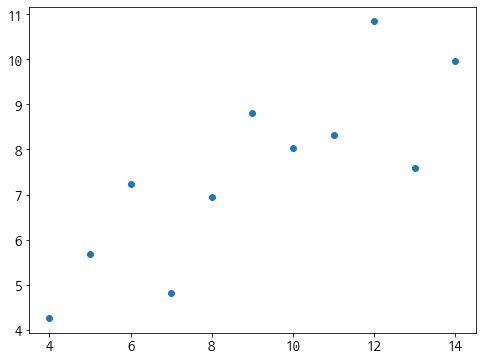

In [36]:
dataset1 = anscombe[anscombe.dataset=='I']
plt.figure(figsize=(8,6))
plt.plot(dataset1.x, dataset1.y, 'o')
plt.show()

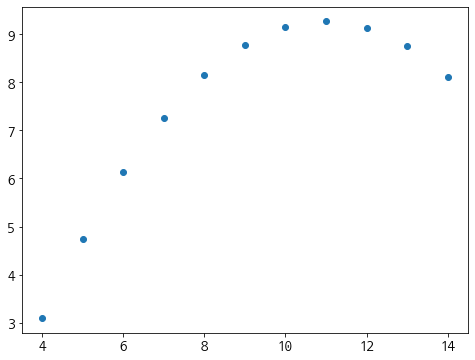

In [37]:
dataset2 = anscombe[anscombe['dataset'] == 'II']
plt.figure(figsize=(8, 6))
plt.plot(dataset2['x'], dataset2['y'], 'o')
plt.show()


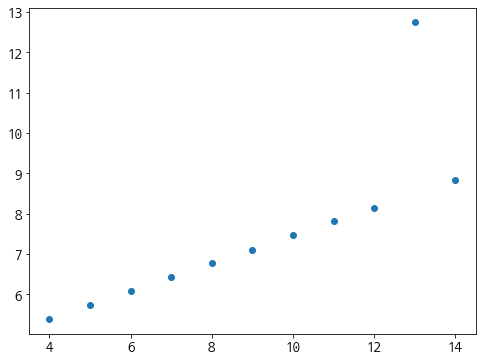

In [38]:
dataset3 = anscombe[anscombe['dataset'] == 'III']
plt.figure(figsize=(8, 6))
plt.plot(dataset3['x'], dataset3['y'], 'o')
plt.show()

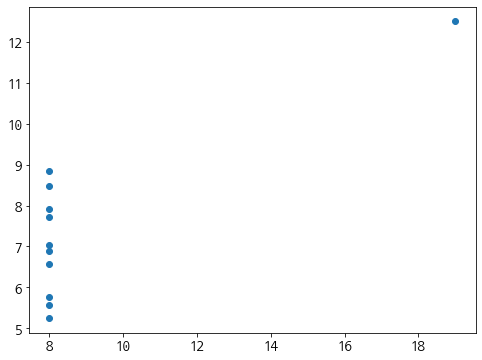

In [39]:
dataset4 = anscombe[anscombe['dataset'] == 'IV']
plt.figure(figsize=(8, 6))
plt.plot(dataset4['x'], dataset4['y'], 'o')
plt.show()

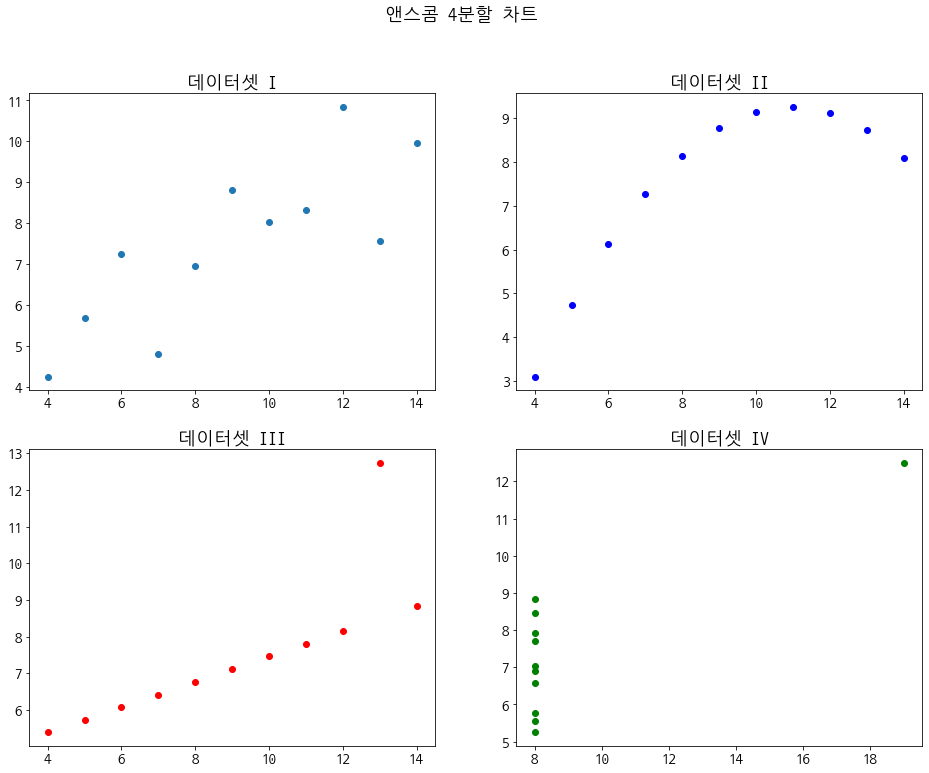

In [52]:
# figure : 기본틀
fig = plt.figure(figsize=(16,12))

# add_subplot : 격자 
axes1= fig.add_subplot(2,2,1)
axes2= fig.add_subplot(2,2,2)
axes3= fig.add_subplot(2,2,3)
axes4= fig.add_subplot(2,2,4)

# plot 그리기
axes1.plot(dataset1['x'], dataset1['y'], 'o')
axes2.plot(dataset2['x'], dataset2['y'], 'ob')
axes3.plot(dataset3['x'], dataset3['y'], 'or')
axes4.plot(dataset4['x'], dataset4['y'], 'og')

# set_title() 함수로 각각의 그래프에 제목을 추가할 수 있다.
axes1.set_title('데이터셋 I')
axes2.set_title('데이터셋 II')
axes3.set_title('데이터셋 III')
axes4.set_title('데이터셋 IV')

# suptitle() 함수로 그래프 전체 제목을 추가할 수 있다.
fig.suptitle('앤스콤 4분할 차트')
# 그래프의 제목과 숫자가 겹쳐보이면 tight_layout() 함수를 실행하면 그래프 레이아웃이 겹치지 않게 조절된다.
# fig.tight_layout()
plt.show()